In [2]:
import pandas as pd
import numpy as np



In [28]:
def return_data(data_dia):
    return data_dia[3:]
#Llegim i ho passem a un dataframe
dades_icovid: pd.DataFrame = pd.read_csv("impacte_covid.csv",sep=";")
dades_icovid.head()
type(dades_icovid['DATA'])
dades_icovid = dades_icovid.assign(DATARETALLADA = lambda x:return_data(dades_icovid['DATA']))

dades_icovid['DATA1'] = dades_icovid['DATA'].transform(return_data)
#dades_icovid.assign(DataRetallada = lambda x:return_data(dades_icovid['DATA'])
dades_icovid


,SEXE,EDAT,DATA,ESDEVENIMENT,PAUTA,RECOMPTE,DATARETALLADA,DATA1
0,Dona,0 a 9,02/02/2022,Cas,No iniciada,461,NaN,02/2022
1,Dona,0 a 9,02/02/2022,Hospitalització,No iniciada,9,NaN,02/2022
2,Dona,0 a 9,02/02/2022,Cas,Parcial,157,NaN,02/2022
3,Dona,0 a 9,02/02/2022,Crítics,No iniciada,1,02/02/2022,02/2022
4,Home,0 a 9,02/02/2022,Cas,No iniciada,452,02/02/2022,02/2022
...,...,...,...,...,...,...,...,...
31330,Home,80 o més,01/01/2021,Hospitalització,No iniciada,19,01/01/2021,01/2021
31331,Home,80 o més,01/01/2021,Cas,No iniciada,37,01/01/2021,01/2021
31332,Home,80 o més,01/01/2021,Crítics,No iniciada,1,01/01/2021,01/2021
31333,Home,80 o més,01/01/2021,Defunció,No iniciada,14,01/01/2021,01/2021


In [3]:
dades_covid.columns

Index(['NOM', 'CODI', 'DATA', 'SEXE', 'GRUP_EDAT', 'RESIDENCIA',
       'CASOS_CONFIRMAT', 'PCR', 'TAR', 'INGRESSOS_TOTAL', 'INGRESSOS_CRITIC',
       'INGRESSATS_TOTAL', 'INGRESSATS_CRITIC', 'EXITUS', 'CASOS_PCR',
       'CASOS_TAR', 'POSITIVITAT_PCR_NUM', 'POSITIVITAT_TAR_NUM',
       'POSITIVITAT_PCR_DEN', 'POSITIVITAT_TAR_DEN', 'VACUNATS_DOSI_1',
       'VACUNATS_DOSI_2'],
      dtype='object')

In [4]:
cols = ['CASOS_CONFIRMAT', 'PCR', 'TAR', 'INGRESSOS_TOTAL', 'INGRESSOS_CRITIC',
       'INGRESSATS_TOTAL', 'INGRESSATS_CRITIC', 'EXITUS', 'CASOS_PCR',
       'CASOS_TAR', 'POSITIVITAT_PCR_NUM']
dades_covid.loc[0:5,"CASOS_CONFIRMAT":"POSITIVITAT_PCR_NUM"]


,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM
0,9,0,8,0,0,0,0,0,0,9,0
1,1,0,3,0,0,0,0,0,0,1,0
2,3,0,1,0,0,1,0,0,0,3,0
3,6,0,4,0,0,1,0,0,0,6,0
4,8,0,9,0,0,0,0,0,0,8,0
5,8,0,5,0,0,0,0,0,0,8,0


In [5]:
barbera_mask: pd.Series = dades_covid.loc[:,"NOM"] == 'ALT CAMP I CONCA DE BARBERÀ'
barbera_mask

barbera_dades: pd.DataFrame = (dades_covid.loc[barbera_mask,['DATA','CASOS_CONFIRMAT']]
                                .query("DATA>'2021-12-01'")
                                .groupby('DATA')
                                .sum()

                                )


In [6]:
lleida_mask: pd.Series = dades_covid.loc[:,"NOM"] == 'LLEIDA'
lleida_mask

lleida_dades: pd.DataFrame = (dades_covid.loc[lleida_mask,['DATA','POSITIVITAT_TAR_NUM']]
                                .query("DATA>'2021-12-01'")
                                .groupby('DATA')
                                .sum()

                                )
lleida_dades

,POSITIVITAT_TAR_NUM
DATA,
2021-12-02,117
2021-12-03,108
2021-12-04,78
2021-12-05,58
2021-12-06,90
2021-12-07,161
2021-12-08,110
2021-12-09,171
2021-12-10,154


<bound method Axes.bar of <AxesSubplot:xlabel='DATA'>>

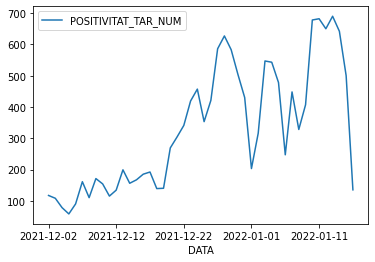

In [7]:
lleida_dades.plot().bar

In [8]:
print(dades_covid)
type(dades_covid)

                                NOM  CODI        DATA  SEXE GRUP_EDAT  \
0       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona     0 a 9   
1       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   10 a 19   
2       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   20 a 29   
3       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   30 a 39   
4       ALT CAMP I CONCA DE BARBERÀ     6  2022-01-16  Dona   40 a 49   
...                             ...   ...         ...   ...       ...   
620356      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home   60 a 69   
620357      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home   70 a 79   
620358      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home  80 o més   
620359      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Home       NaN   
620360      VALLÈS ORIENTAL CENTRAL    69  2020-03-01  Tots      Tots   

       RESIDENCIA  CASOS_CONFIRMAT  PCR  TAR  INGRESSOS_TOTAL  ...  \
0              No                9    0    8         

pandas.core.frame.DataFrame

### Mitjana
*Suma dels valors totals de les mostres dividit per la quantitat de mostres existents*

In [9]:
#print(barbera_mask)
barbera_dades_total: pd.Series = dades_covid.loc[barbera_mask,'CASOS_CONFIRMAT']
#calculem la mitja
print((sum(barbera_dades_total)/len(barbera_dades_total)))



0.718860469952173


In [10]:
#la media es buen descriptor si los dados son mas o menos homogeneos, pero en casos de varios datos extremos
#la media no es el mejor indicador para un estudio.
print(barbera_dades_total.mean());

0.718860469952173


<AxesSubplot:xlabel='DATA'>

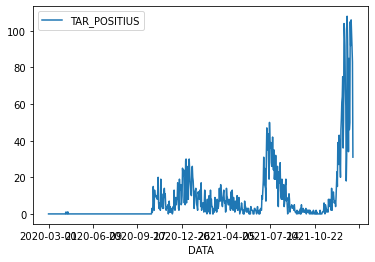

In [11]:
barbera_dades_df = (dades_covid.query('NOM == "ALT CAMP I CONCA DE BARBERÀ"')
                    .loc[:,['DATA','POSITIVITAT_TAR_NUM']]
                    .groupby('DATA')
                    .sum()
                    .rename(columns={"POSITIVITAT_TAR_NUM":"TAR_POSITIUS"}))

barbera_dades_df.plot()

In [12]:
tar_positius: pd.Series = barbera_dades_df.loc[:,"TAR_POSITIUS"]
tar_positius

DATA
2020-03-01      0
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      0
             ... 
2022-01-12    106
2022-01-13     99
2022-01-14     91
2022-01-15     83
2022-01-16     31
Name: TAR_POSITIUS, Length: 687, dtype: int64

In [13]:
def get_mean(ser: pd.Series) -> float:
        return sum(ser)/len(ser)

print(get_mean(tar_positius))

7.941775836972344


### Moda 
*Valor que es repeteix més sovint*

In [14]:
#Mean
#Make sure

def get_mode(ser: pd.Series) -> tuple[int,int]:

        # Make counter dictionary
        # Keys: Number of positives per day(without repeats)
        # Values Frequencies of that number (zero initially)
        pos_freq_dict: dict[int, int] = dict.fromkeys(sorted(set(ser)),0)

        #Calculate frequencies
        for num_pos in ser:
            pos_freq_dict[num_pos] += 1

        #Sort dictionary by values[frequencies)]
        pos_freq_tuples:        list[tuple[int,int]] = pos_freq_dict.items()
        #ordenem pel segon item de forma descendent (reverse=True)
        sorted_pos_freq_tuples: list[tuple[int,int]] = sorted(pos_freq_tuples,
                                                            key=lambda item: item[1],
                                                            reverse=True)
        mode_freq:          tuple[int,int]           = sorted_pos_freq_tuples[0]
        return mode_freq


# Mode = 0
# Frequency = 234
# tar_positius_value_counts()
# tar_positius_mode()
get_mode(tar_positius)


(0, 274)

In [15]:
tar_positius.mode

<bound method Series.mode of DATA
2020-03-01      0
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      0
             ... 
2022-01-12    106
2022-01-13     99
2022-01-14     91
2022-01-15     83
2022-01-16     31
Name: TAR_POSITIUS, Length: 687, dtype: int64>

In [16]:
#Using Panda's .value_counts
#Per calcular la moda amb panda's
freqs: pd.Series = tar_positius.value_counts()
mode: int        = freqs.index[0]
freqs[mode]
print(freqs)


0     274
2      52
1      50
4      37
3      32
     ... 
40      1
41      1
47      1
29      1
83      1
Name: TAR_POSITIUS, Length: 65, dtype: int64


### Mediana 
*Punt on la mitad de la mostra esta per sota i l'altra meitat, esta per sobre del valor de la mediana*

<AxesSubplot:xlabel='DATA'>

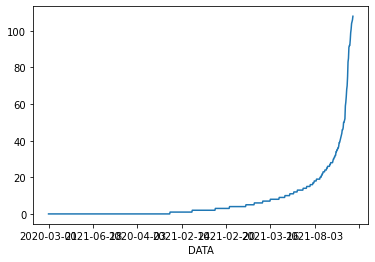

In [17]:
def get_median(ser: pd.Series) -> float:

    sorted_data:    list[int]   = sorted(ser)
    length:         int         = len(sorted_data)
    middle_index:   int         = length // 2

    middle_value:           int         = sorted_data[middle_index]
    middle_value_from_end:  int         = sorted_data[-middle_index]
    middle_mean:            float       = (middle_value + middle_value_from_end)/2

    return middle_mean


#tar_positius.sort_values()
#amb la gràfica es veu fàcil, perque la linea (horitzontal) que és veu més, allò es la moda. La mediana
#es just la del mig
tar_positius.sort_values().plot()

In [18]:
#tar_positius.median()
get_median(tar_positius)

2.0

# Cuantil i Outlier

<AxesSubplot:>

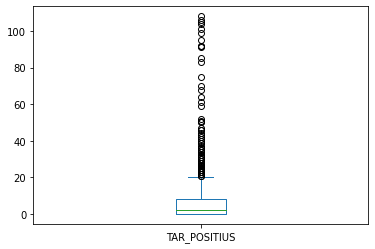

In [19]:
tar_positius.plot.box()

In [20]:
media:                      int         = tar_positius.mean()
print(media)
desviacio_media_positius:   list[float]   = []
for num_pos in tar_positius:
    desviacio_media_positius.append(abs(num_pos-media))
        

print(desviacio_media_positius)


7.941775836972344
[7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 6.941775836972344, 7.941775836972344, 7.941775836972344, 6.941775836972344, 7.941775836972344, 6.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.941775836972344, 7.9417758369

7.941775836972344
DATA
2020-03-01     7.941776
2020-03-02     7.941776
2020-03-03     7.941776
2020-03-04     7.941776
2020-03-05     7.941776
                ...    
2022-01-12    98.058224
2022-01-13    91.058224
2022-01-14    83.058224
2022-01-15    75.058224
2022-01-16    23.058224
Name: TAR_POSITIUS, Length: 687, dtype: float64


<AxesSubplot:>

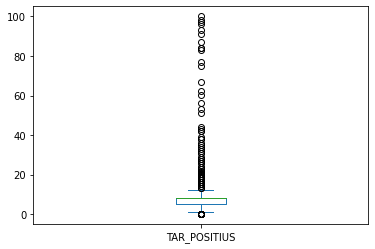

In [21]:
#Programació vectorial, es aquella que tracta les llistes (arrays,llistes, vectors) 
# com si fossin escalars, per no escriure bucles
# Això ho permet Pandas, Numpy, Julian, Fortran
#desviacio_media_positius.plot.box() no funciona
media:                      int         = tar_positius.mean()
print(media)
desviacio_media_positius_vectorial:   pd.Series = (tar_positius - media).abs()

print(desviacio_media_positius_vectorial)

desviacio_media_positius_vectorial.plot.box()